# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

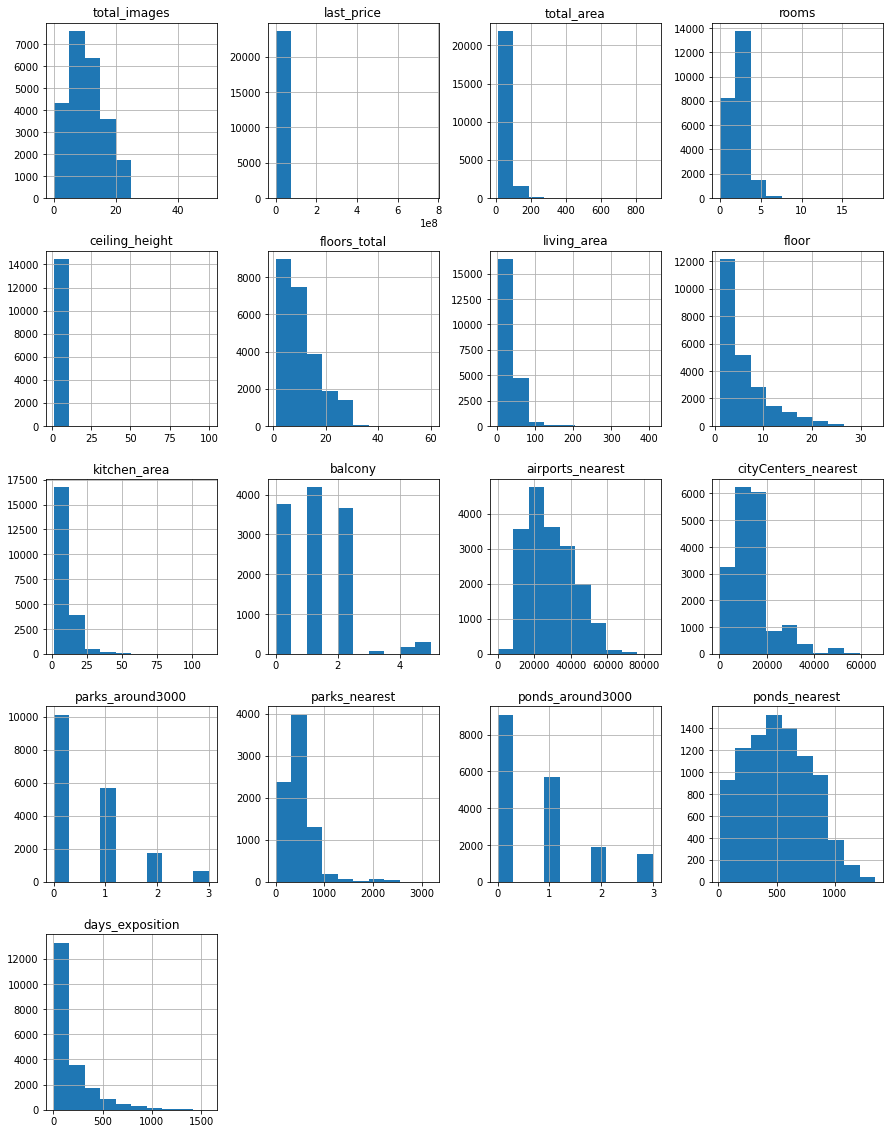

In [4]:
data.hist(figsize=(15, 20));

     В столбце 'ceiling_height' практически в трети объявлений пропущенно значение, заменим пропуски медианным значением данного столбца. Так же имеютс аномальные значения в данных - это 100, 25, 36 м.
     'is_apartment' - так же имеет пропуски значений, можем предположить что это не апартаменты и присвоить False с заменой типом данных на булевой тип данных.
     'balcony' - скорее всего балконы отсутствуют, можно заменить значени на ноль. Так же заменить тип данных с вещественного на цельночисленный.
     'first_day_exposition' - содержаться данные типа object, для дальнейшего анализа сменим их на тип дпнных - datetime64.
     'locality_name' - содержит пропуски и не явные дубликаты. Выявим и заменим дубликаты. Пропуски заполнить не представляется возможным, данные просто не заполнили.
      'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'floors_total' - в данных есть пропуски, оставляем Null без изменений.
      'kitchen_area'- имеются аномальные значения в виде площади кухни 1,5 м.кв и 50 и более м.кв. Удалим аномальные значения и заполним пропуски отношением медианного значения площади кухни к медианному значению общей площади через коофециент.
      'living_area' - присутствуют выбросы данных в виде значений в районе 2-3 м.кв. Основна часть данныйх сосредоточена в диапазоне 13-21 м кв и 25-35 м.кв. Имеются пропуски которые можно заполнить отношением медианного значения жилой площади  к медианному значению общей площади через коофециент.

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце 'balcony' допущено 11519 пропусков можно предположить, что у объекта недвижимости отсутствует балкон. Заменим пропущенные значени на "0". Заодно и заменим тип данных с вещественного на цельночисленный.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

Столбец 'is_apartment' содержит данные: True, False и пропуски. Можно предположить, что это буллевы значени и заменить тип данных. Пропуски очевидно означают, что объект недвижимости не является  аппартаментами, заменим пропуски на значение False.   

In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna('False')

In [8]:
data['is_apartment'].value_counts()#проведем проверку замены типа данных

True     20974
False     2725
Name: is_apartment, dtype: int64

In [9]:
data['is_apartment'].isna().sum()#проведем проверку замены заполнени пропусков

0

В столбце 'locality_name' не представлется возможным заменить пропуски, в связи с немногочисленным их количеством строки будут удалены.

In [10]:
data.dropna(subset=['locality_name'], inplace=True)

В столбце 'floors_total' не представлется возможным заменить пропуски, в связи с немногочисленным их количеством строки будут так же удалены.

In [11]:
data.dropna(subset=['floors_total'], inplace=True)

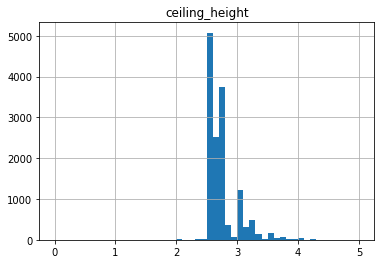

In [12]:
data.hist(column='ceiling_height',bins=50,range=(0,5));

In [13]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Анализируя колонку 'ceiling_height' можно сделать вывод, что имеются аномальные значения - выбросы, большинство значений находться в промежутке между 2,5 -2.8 метрами. Далее проверим уникальные значения столбца:

In [14]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Для дальнейшего аназа необходимо избавиться от выбросов: 100, 25, 36 метров это ошибка ввода значения имеющего вещественный числовой тип данных. Эти значения необходимо разделить на 10.

In [15]:

data.loc[(data['ceiling_height'] >10) & (data['ceiling_height'] <= 100),'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [16]:
data['ceiling_height'].isna().sum()#проверим пропуски в столбце

9084

Пропуски в столбце 'ceiling_height' можно заполнить медианным значением.

In [17]:
data['ceiling_height'].loc[data['ceiling_height'].isna()]=data['ceiling_height'].median()

In [18]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.697818
std          0.238002
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Высота потолка менее 2,5 метров может влтьс аномальным значением, т.к таких значений всего 78 их можно удалить из таблицы.

In [19]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

In [20]:
data['ceiling_height'].describe()

count    23487.000000
mean         2.699214
std          0.236467
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [21]:
data['ceiling_height'].isna().sum()#проверим результат заполнени пропусков

0

В столбце 'first_day_exposition' содержаться данные типа object, дл дальнейшего анализа сменим их на тип дпнных - datetime64.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [23]:
data['locality_name'].duplicated().sum()#далее исследуем столбец с названими населенных пунктов

23124

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
data['locality_name'].nunique()

363

Столбец с названиями населенных пунктов содержит не явные дубликаты: наименовани "поселок" содержат в составе как букву 'ё'и'е'. Так же встречаются различные наименования 'городской поселок' и 'поселок городского типа'. Приведем к одному типу данные:

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [27]:
data['locality_name'].duplicated().sum()#Проверим результат замены значений

23165

In [28]:
data['locality_name'].nunique()#Проверим результат замены значений

322

In [29]:
data['kitchen_area'].describe()

count    21273.000000
mean        10.569503
std          5.905436
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

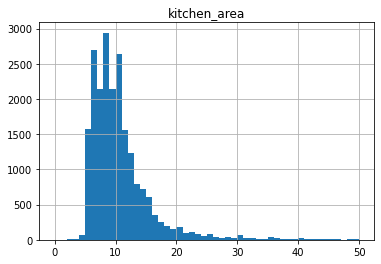

In [30]:
data.hist(column='kitchen_area',bins=50,range=(0,50));

Пропуски в значених площади кухни заполним отношением медианного значения площади кухни к медианному значению общей площади через коофециент.

In [31]:
attitude = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(attitude * data['total_area'], inplace=True)

Анализ столбца 'kitchen_area' говорит о том что в столбце имеются аномальные значения в виде площади кухни 1,5 м.кв и 50 и более м.кв. Удалим аномальные значения: 

In [32]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

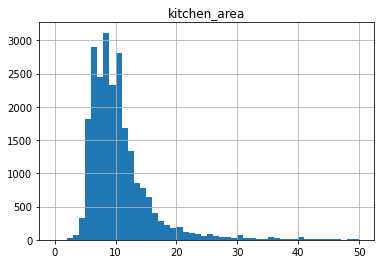

In [33]:
data.hist(column='kitchen_area',bins=50,range=(0,50));#проверим результат удалени аномальных значений

In [34]:
data['kitchen_area'].isna().sum()

0

In [35]:
data['kitchen_area'].describe()

count    23426.000000
mean        10.365469
std          5.297621
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

Проведем анализ столбца 'rooms'

In [36]:
data['rooms'].value_counts()

1     7978
2     7857
3     5745
4     1158
5      314
0      193
6      102
7       51
8       11
9        8
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

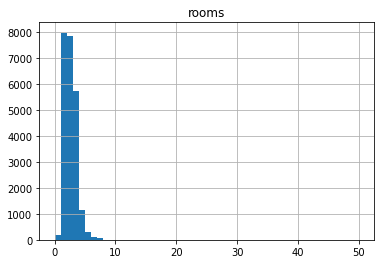

In [37]:
data.hist(column='rooms',bins=50,range=(0,50));

In [38]:
data['rooms'].describe()

count    23426.000000
mean         2.064928
std          1.067143
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [39]:
data.drop(index=data.query('rooms > 8').index,inplace=True)# удалим объекты с большим количеством комнат

В основном данные значений количества комнат сосредоточенны в диапазоне от 1 до 4 комнат. Есть аномальные значения такие как 0 комнат, но в сводной таблице ниже видно что нулевое количество комнат относиться к аппартаментам, поэтому 0 значение можно заменить либо на единицу или же оставить как есть. Так же удалим объекты с большим количеством комнат.

In [40]:
data.pivot_table(index='rooms', values=['is_apartment','open_plan'], aggfunc='count')

,is_apartment,open_plan
rooms,,
0,193,193
1,7978,7978
2,7857,7857
3,5745,5745
4,1158,1158
5,314,314
6,102,102
7,51,51
8,11,11


In [41]:
data['living_area'].describe()

count    21563.000000
mean        34.168911
std         20.839618
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

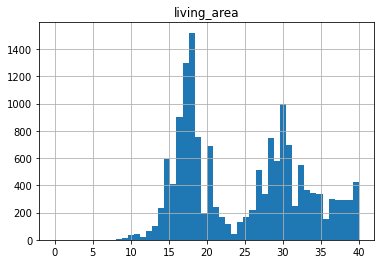

In [42]:
data.hist(column='living_area',bins=50,range=(0,40));

В столбце 'living_area' присутствуют выбросы данных в виде значений в районе 2-3 м.кв. Основна часть данныйх сосредоточена в диапазоне 13-21 м кв и 25-35 м.кв. Принял решение удалить из датафрейма данные менее 10 м.кв. 

In [43]:
data.drop(index=data.query('living_area < 10').index,inplace=True)

Пропуски в значених жилой площади заполним отношением медианного значения жилой площади  к медианному значению общей площади через коофециент.

In [44]:
ratio = data['living_area'].median() / data['total_area'].median()
data['living_area'].fillna(ratio * data['total_area'], inplace=True)

In [45]:
data.isna().sum()#проверим результаты заполнени пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5490
cityCenters_nearest      5467
parks_around3000         5466
parks_nearest           15450
ponds_around3000         5466
ponds_nearest           14430
days_exposition          3138
dtype: int64

In [46]:
data.shape[0]#датафрейм не перезаписывал в новую переменную посчитаем в ручную, изначально было 23699 строк, т.е. удалили 315 строк

23384

### Посчитайте и добавьте в таблицу новые столбцы

Цена квадратного метра

In [47]:
data['price_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,False,False,11.000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,False,False,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,True,False,False,27.825,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,False,False,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Посчитаны и добавлены в таблицу столбцы: день, месяц, год публикации объявления

In [48]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year

Добавим группировку по этажности: первый, последний, другой с помощью функции:

In [49]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)

In [50]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)#приведем к общепринятой стилистикой оформления названий столбцов

Расстояние до центра города в км с округлением.

In [51]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [52]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,False,False,11.000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,False,False,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,True,False,False,27.825,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,False,False,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

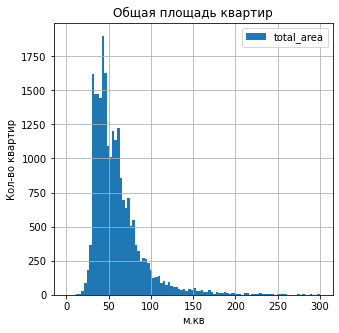

In [53]:
data.plot(y = 'total_area', bins = 100, grid=True, figsize = (5,5), kind = 'hist', range = (0,300))
plt.title('Общая площадь квартир')
plt.xlabel('м.кв')
plt.ylabel('Кол-во квартир')
plt.show()

In [54]:
data['total_area'].describe()

count    23384.00000
mean        59.67527
std         32.55011
min         12.00000
25%         40.00000
50%         52.00000
75%         69.30000
max        631.20000
Name: total_area, dtype: float64

<div class="alert alert-success">
<font color='blue'>Большенство квартир имеют общую площадь менее 100 м.кв., пики на гистограмме приходяться на значени в районе 45-50 м.кв. Имеются выбросы в данных, значения общей площади недвижимости более 200 м.кв.</font>

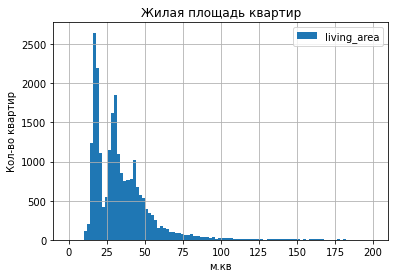

In [55]:
data.plot(y = 'living_area', bins = 100, grid=True, figsize = (6,4), kind = 'hist', range = (0,200))
plt.title('Жилая площадь квартир')
plt.xlabel('м.кв')
plt.ylabel('Кол-во квартир')
plt.show()

In [56]:
data['living_area'].describe()

count    23384.000000
mean        34.288490
std         20.808067
min          7.500000
25%         19.000000
50%         30.000000
75%         42.000000
max        347.500000
Name: living_area, dtype: float64

<div class="alert alert-success">
<font color='blue'>Значения жилой площади не составляю равномерное сосредоточение в каком либо диапазоне. Данные сосредоточены в 18-23 м.кв с провалом на 23-25 м.кв, а далее основна масса значений в районе 26-50 м.кв. Имеются так же выбросы в данных, значения более 100 м.кв.</font>

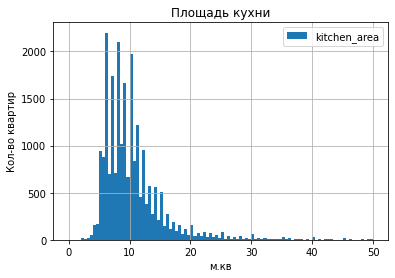

In [57]:
data.plot(y = 'kitchen_area', bins = 100, grid=True, figsize = (6,4), kind = 'hist', range = (0,50))
plt.title('Площадь кухни')
plt.xlabel('м.кв')
plt.ylabel('Кол-во квартир')
plt.show()

In [58]:
data['kitchen_area'].describe()

count    23384.000000
mean        10.349676
std          5.269482
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

<div class="alert alert-success">
<font color='blue'>Анализируя столбец 'kitchen_area', выше были  удалены аномальные значения в виде площади кухни 1,5 м.кв и 50 и более м.кв. Пропуски в значених площади кухни заполнил отношением медианного значения площади кухни к медианному значению общей площади через коофециент. Как теперь видно на гистограмме, основная масса значений сосредоточенна в районе от 6 до 15 м.кв.</font>

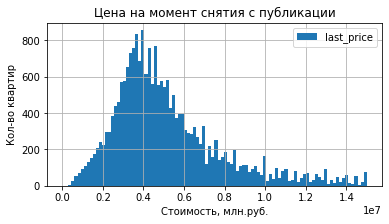

In [59]:
data.plot(y='last_price', bins = 100, grid=True, figsize = (6,3), kind = 'hist', range = (0,15000000))
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Стоимость, млн.руб.')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>Оснавная масса недвижимости представленна в диапазоне стоимости от 3 до 5,5 млн.руб. Есть недвижимость стоимостью более 10 млн.руб, но такие объекты представленны в малом количестве.</font>

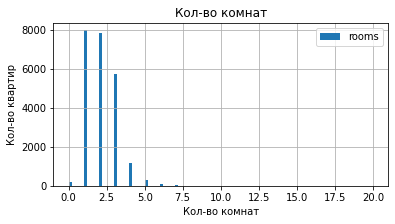

In [60]:
data.plot(y = 'rooms', bins = 100, grid=True, figsize = (6,3), kind = 'hist', range = (0,20))
plt.title('Кол-во комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.show()

In [61]:
data['rooms'].describe()

count    23384.000000
mean         2.059143
std          1.037038
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

<div class="alert alert-success">
<font color='blue'>Из описани данных видно, что в основном недвижимость имеет  1, 2 и 3 комнат. Есть небольшая доля и 4-комнатных. Имеются выбросы со значением в ноль комнат, на как узнали ранее это относиться к апартаментам. Недвижимость с количеством комнат более 5 встречается редко.</font>

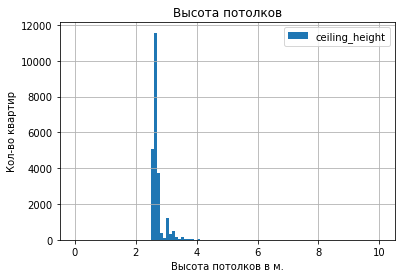

In [62]:
data.plot(y = 'ceiling_height', bins = 100, grid=True, figsize = (6,4), kind = 'hist', range = (0,10))
plt.title('Высота потолков')
plt.xlabel('Высота потолков в м.')
plt.ylabel('Кол-во квартир')
plt.show()

In [63]:
data['ceiling_height'].describe()

count    23384.000000
mean         2.697721
std          0.233486
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-success">
<font color='blue'>Для дальнейшего аназа избавился от выбросов: 100, 25, 36 метров это ошибка ввода значения имеющего вещественный числовой тип данных. Эти значения разделил на 10. Анализируя очищенные от выбросов данные, видно, что оснавная масса значений в районе 2,5-3 метров. Есть максимальные значения в 10 метров, их тоже можно отнести к аномальным значениям.</font>

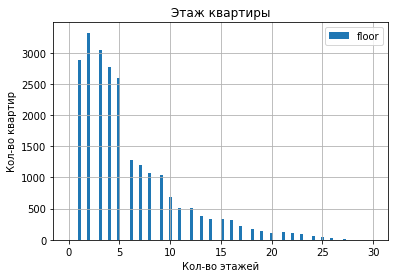

In [64]:
data.plot(y = 'floor', bins = 100, grid=True, figsize = (6,4), kind = 'hist', range = (0,30))
plt.title('Этаж квартиры')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во квартир')
plt.show()

In [65]:
data['floor'].describe()

count    23384.000000
mean         5.883082
std          4.876214
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<div class="alert alert-success">
<font color='blue'>Большинство объектов недвижимости находятся в диапазане значений от 1 до 5 этажей. Далее идет тенденци к уменьшению этажности.</font>

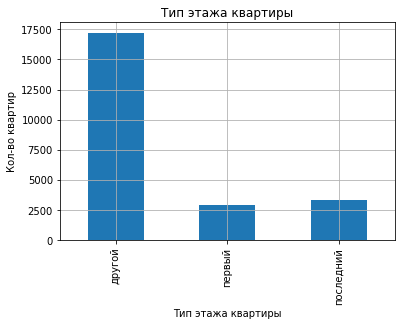

In [66]:
data.groupby('floor_type')['floor_type'].count().plot(grid=True, figsize = (6,4), kind = 'bar', ylabel = 'count')
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>Объектов недвижимости, находящихся на первом и последнем этажах одинаково малое количество по отношению к сгруппированному значение "другой" этаж.</font>

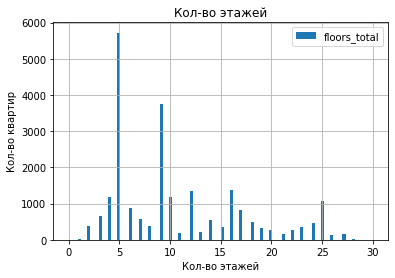

In [67]:
data.plot(y = 'floors_total', bins = 100, grid=True, figsize = (6,4), kind = 'hist', range = (0,30))
plt.title('Кол-во этажей')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во квартир')
plt.show()

In [68]:
data['floors_total'].describe()

count    23384.000000
mean        10.694962
std          6.598003
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<div class="alert alert-success">
<font color='blue'>Из гистограммы видно, что преобладают объекты с этажностью в 5 и 9 этажей, далее данные варьируются без какой-либо консолидации возле какого-то значения. Выделяются значения в 4,10,12,16 этажей общей этажности объекта.  </font>

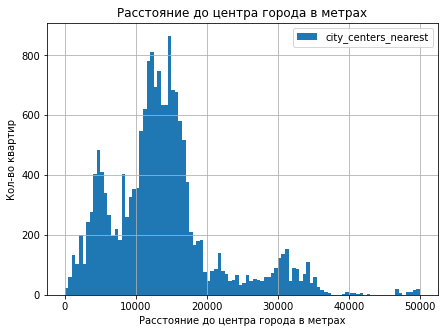

In [69]:
data.plot(y = 'city_centers_nearest', bins = 100, grid=True, figsize = (7,5), kind = 'hist', range = (0,50000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>Вернее всего данные по расстоянию до центра города поделить на 2 группы: значения малой группы составляют от 0 до 8 тыс метров и большая группа объектов недвижимости со значениями от 8 тыс до 18 тыс метров. Объекты с удаленностью 20 тыс метров и более встречаются значительно реже.  </font>

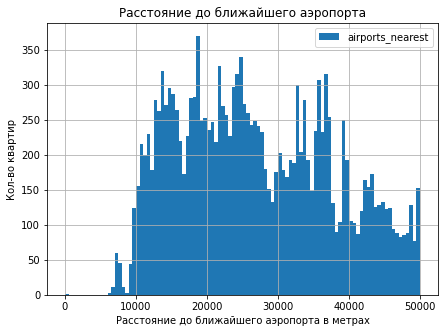

In [70]:
data.plot(y = 'airports_nearest', bins = 100, grid=True, figsize = (7,5), kind = 'hist', range = (0,50000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>По удаленности от аэропорта нет большой плотности в данных, объектов примерно равное количество в значениях до 40 тыс метров.  </font>

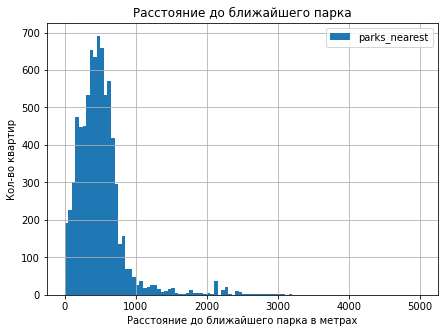

In [71]:
data.plot(y = 'parks_nearest', bins = 100, grid=True, figsize = (7,5), kind = 'hist', range = (0,5000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>По удаленности от парка, вспомним, столбец содержит большое количество пустых значений, скорее всего если парк находиться не в пешей доступности или более 1 тыс метров, то данные о наличии парка не вносятся пользователем за ненадобностью.</font>

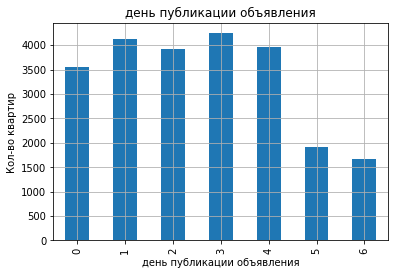

In [72]:
data.groupby('day_of_publication')['day_of_publication'].count().plot(grid=True, figsize = (6,4), kind = 'bar', ylabel = 'count')
plt.title('день публикации объявления')
plt.xlabel('день публикации объявления')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>Основная масса объявлений публиковалась со вторника по пятницу. В выходные дни публикаций в два раза меньше.</font>

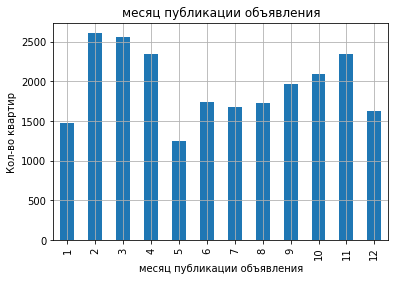

In [73]:
data.groupby('month_of_publication')['month_of_publication'].count().plot(grid=True, figsize = (6,4), kind = 'bar', ylabel = 'count')
plt.title('месяц публикации объявления')
plt.xlabel('месяц публикации объявления')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>По граффику видно, что с февраля по апрель было более актиное опубликование объявлений. Так же был плавный рост активности с июля по ноябрь. Менее активные публикации в декабре, январе и мае.</font>

In [74]:
data['days_exposition'].describe()

count    20246.000000
mean       180.494715
std        219.523424
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

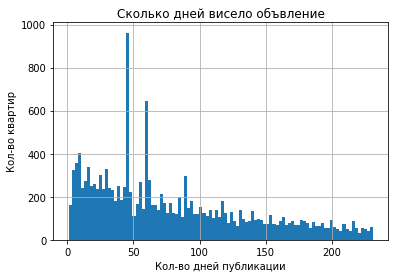

In [75]:
data['days_exposition'].hist(bins=100, range = (1,231));
plt.title('Сколько дней висело объвление')
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во квартир')
plt.show()

<div class="alert alert-success">
<font color='blue'>Среднее время продажи - 180 дней. Медианное время продажи - 95 дней. В основном квартиры продаются за срок порядка 120 дней, т.к в этом диапазоне наблюдается наибольшая плотность значений по количеству квартир. Быстрой продажей можно назвать срок в 45 и 60 дней и меньше. На этих значениях наблюдается резкий всплеск на гистограмме. Долгой продажей, исходя из данных графика, можно считать время продажи более 230 дней.</font>

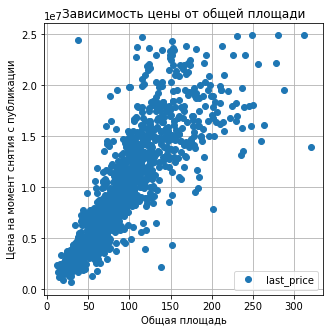

In [76]:
data.query('last_price<25000000').pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

In [77]:
data['total_area'].corr(data['last_price'])

0.6804646875815923

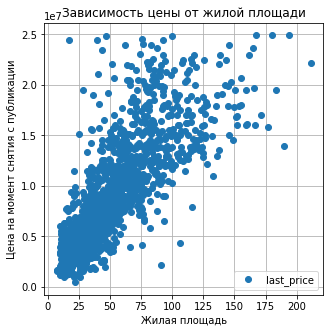

In [78]:
data.query('last_price<25000000').pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

In [79]:
data['living_area'].corr(data['last_price'])

0.616446071825761

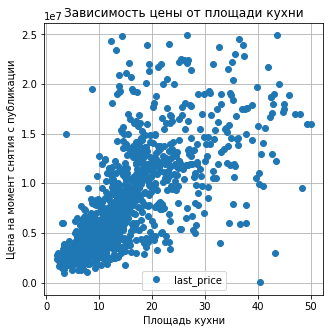

In [80]:
data.query('last_price<25000000').pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5,5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

In [81]:
data['kitchen_area'].corr(data['last_price'])

0.4968123592215486

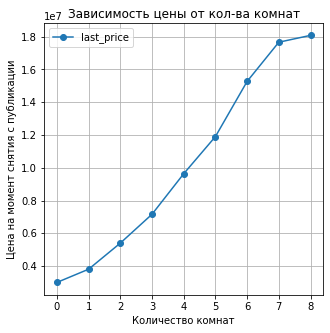

In [82]:
data.query('last_price<25000000').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от кол-ва комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

In [83]:
data['rooms'].corr(data['last_price'])

0.3882820721635786

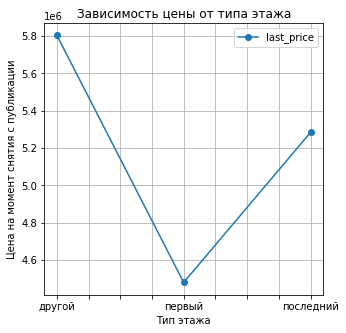

In [84]:
data.query('last_price<25000000').pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

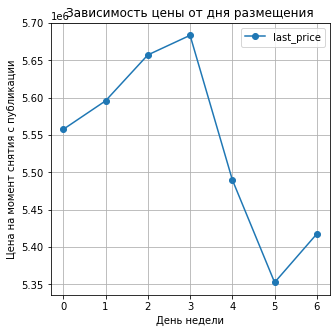

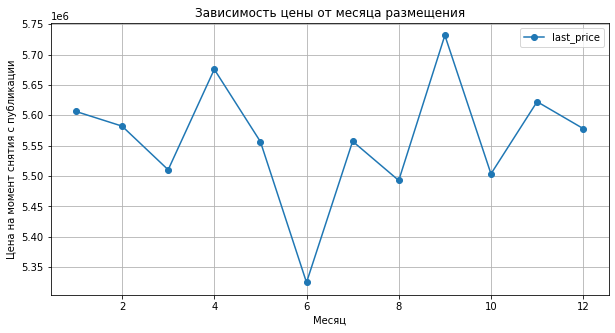

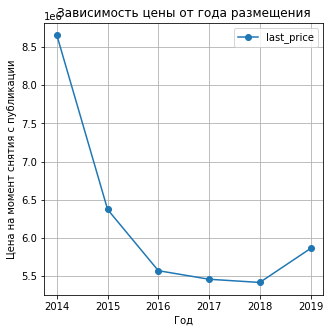

In [85]:
data.query('last_price<25000000').pivot_table(index='day_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от дня размещения')
plt.xlabel('День недели')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
data.query('last_price<25000000').pivot_table(index='month_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(10,5))
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
data.query('last_price<25000000').pivot_table(index='year_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(5,5))
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

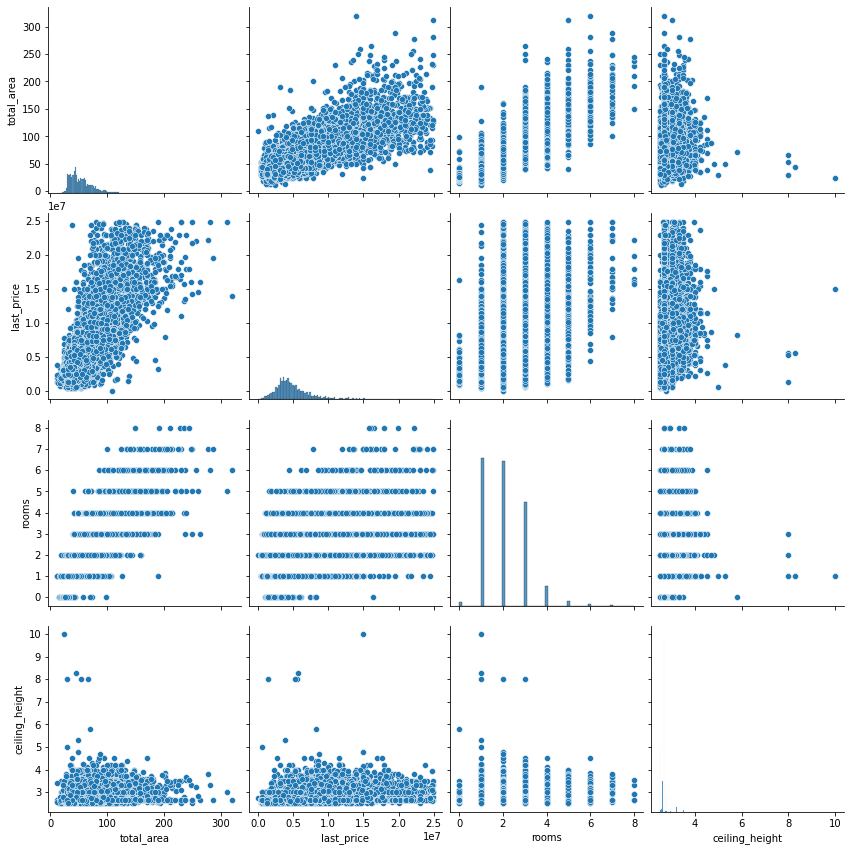

In [86]:
data_good = data.query('last_price<25000000')
sns.pairplot(data_good, vars=['total_area', 'last_price', 'rooms', 'ceiling_height'],height=3);

<div class="alert alert-success">
<font color='blue'>Выводы из анализа факторов больше всего влияющих на общую (полную) стоимость объекта.
    Наблюдается наличие линейной связи между данными, ценой объектов недвижимости и данными общей, жилой площадей и площади кухни. Коэффициент корреляции Пирсона — положительный и составлет значение от 0,68 по зависимости цены от общей площади, 0,61 по зависимости цены от жилой площади и 0,5 по зависимости цены от площади кухни. Т.е больще всего линейная связь наблюдается в зависимости цены от общей площади объекта. Соответствено с возрастанием общей площади мы наблюдаем большую цену.
    Количество комнат так же влияет на цену объекта, но линейна зависимость меньше, коэффициент коррелции 0,39. Так же стоит отметить, что с возрастанием количества комнат более 9, цена объекта снижается.
  По типу этажа зависимость к стоимости объекта следующая: самые дорогие объекты находятся не на первом и не на последних этажах. Дешевле всего из выборки объекты первого этажа.
  Зависимость цены от дня публикации следующая: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу. В целом с понедельника по среду вверхидущая тенденция с последующим резким спадом со среды.
  Зависимость цены от месяца публикации следующая: дороже всего квартиры, продающиеся с апреля и сентября, дешевле всего - с июня.
  Зависимость цены от года публикации следующая: Наблюдается обвал цен на  недвижимость с 2014 года, с достижением пика падения в 2018 году.
</font>

Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [87]:
mean_price = data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count','mean'])
mean_price.columns = ['Кол-во объявлений', 'Средняя цена за 1 м.кв.']
mean_price_2 = mean_price.sort_values('Кол-во объявлений', ascending=False).head(10)
mean_price_2

,Кол-во объявлений,Средняя цена за 1 м.кв.
locality_name,,
Санкт-Петербург,15517,114269.546603
поселок Мурино,551,85601.120803
поселок Шушары,438,78577.014984
Всеволожск,397,68719.320400
Пушкин,362,102920.402832
Колпино,337,75443.972838
поселок Парголово,326,90205.423758
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


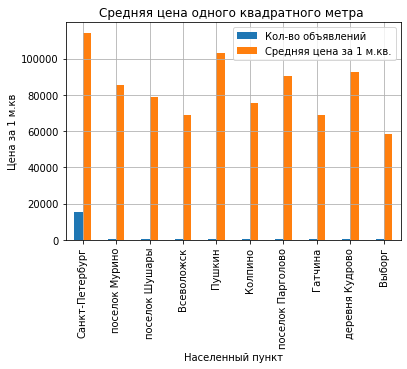

In [88]:
mean_price_2.plot(kind='bar', grid=True)
plt.title('Средняя цена одного квадратного метра ')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена за 1 м.кв')
plt.show()

<div class="alert alert-success">
<font color='blue'>Из составленного рейтинга видно что макимальная средняя стоимость 1 м.кв в г. Санкт-Петербуг и составляет 114 259 руб., минимальная средняя стоимость 1 м.кв в г. Выборг-58238 руб.</font>

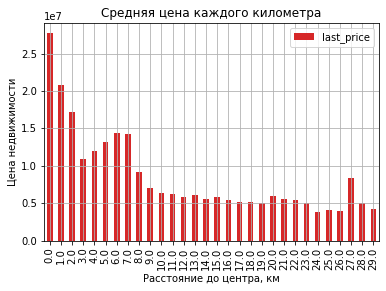

In [89]:
data.query('locality_name=="Санкт-Петербург"').pivot_table(index='city_centers_nearest_km',values='last_price').plot(kind='bar', grid=True, color='tab:red')
plt.title('Средняя цена каждого километра')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена недвижимости')
plt.show()

<div class="alert alert-success">
<font color='blue'>Самые дорогие объекты недвижимости г. Санкт-Петербург находятся на расстонии около 2 км от центра города. На расстоянии более 8 км удаленности от центра, цена объектов недвижимости имеет низходщюю тенденцию. Есть отклоненние от тенденции на 27 км расстояния, возможно это связано с наличием объекта элитной недвижимости.</font>

### Общий вывод

  <div class="alert alert-success">
<font color='blue'> Оснавная масса недвижимости представленна в диапазоне стоимости от 3 до 5,5 млн.руб. Есть недвижимость стоимостью более 10 млн.руб, но такие объекты представленны в малом количестве.
Среднее время продажи - 180 дней. Медианное время продажи - 95 дней. В основном квартиры продаются за срок порядка 120 дней. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей можно считать время продажи более 230 дней.
C февраля по апрель было более актиное опубликование объявлений. Так же был плавный рост активности с июля по ноябрь. Менее активные публикации в декабре, январе и мае.Основная масса объявлений публиковалась со вторника по пятницу. В выходные дни публикаций в два раза меньше.
  Наблюдается наличие линейной связи между данными, ценой объектов недвижимости и данными общей, жилой площадей и площади кухни. Коэффициент корреляции Пирсона — положительный и составлет значение от 0,68 по зависимости цены от общей площади, 0,61 по зависимости цены от жилой площади и 0,5 по зависимости цены от площади кухни. Т.е больще всего линейная связь наблюдается в зависимости цены от общей площади объекта. Соответствено с возрастанием общей площади мы наблюдаем большую цену.
    Количество комнат так же влияет на цену объекта, но линейна зависимость меньше, коэффициент коррелции 0,39. Так же стоит отметить, что с возрастанием количества комнат более 9, цена объекта снижается.
  По типу этажа зависимость к стоимости объекта следующая: самые дорогие объекты находятся не на первом и не на последних этажах. Дешевле всего из выборки объекты первого этажа.
  Зависимость цены от дня публикации следующая: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу. В целом с понедельника по среду вверхидущая тенденция с последующим резким спадом со среды.
  Зависимость цены от месяца публикации следующая: дороже всего квартиры, продающиеся с апреля и сентября, дешевле всего - с июня.
  Зависимость цены от года публикации следующая: Наблюдается обвал цен на  недвижимость с 2014 года, с достижением пика падения в 2018 году.
  Макимальная средняя стоимость 1 м.кв в г. Санкт-Петербуг и составляет 114 259 руб., минимальная средняя стоимость 1 м.кв в г. Выборг-58238 руб.
  Самые дорогие объекты недвижимости г. Санкт-Петербург находятся на расстонии около 2 км от центра города. На расстоянии более 8 км удаленности от центра, цена объектов недвижимости имеет низходщюю тенденцию. Есть отклоненние от тенденции на 27 км расстояния, возможно это связано с наличием объекта элитной недвижимости.</font>
  